## Book Price Prediction 📚

### Introduction( Problem Definition)

Books are the most important friends in one’s life. Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. 

Here we explore a big database of books. Books of different genres, from thousands of authors. In this project, we will use the dataset to build a Machine Learning model to predict the price of books based on a given set of features.


FEATURES:

* Title: The title of the book
* Author: The author(s) of the book.
* Edition: The edition of the book eg (Paperback
* Item url: A link to the book on bookdepository.com
* Image url: A link to the book's image
* Publish date: The date of release eg(26 Apr 2018)
* BookCategory: The department the book is usually available at.
* Price: The price of the book (Target variable)

### Approach

1. Problem definition
2. Creating a dataset for the future model
3. Exploring The Data Sets, Cleaning, Processing 
4. Selection of algorithm(Building A Regressor)
5. Evaluating the trained model
6. Deploying the model

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

### Creating dataset for feature model

In [2]:
!pip install git+https://github.com/fortune-uwha/book_scraper

  Cloning https://github.com/fortune-uwha/book_scraper to /tmp/pip-req-build-cwtvcdq2
  Running command git clone -q https://github.com/fortune-uwha/book_scraper /tmp/pip-req-build-cwtvcdq2
     |████████████████████████████████| 115 kB 5.1 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 178 kB 52.7 MB/s 
     |████████████████████████████████| 15.7 MB 75 kB/s 
     |████████████████████████████████| 11.5 MB 17.5 MB/s 
     |████████████████████████████████| 379 kB 41.4 MB/s 
     |████████████████████████████████| 227 kB 62.1 MB/s 
     |████████████████████████████████| 510 kB 70.0 MB/s 
     |████████████████████████████████| 61 kB 7.3 MB/s 
     |████████████████████████████████| 138 kB 64.8 MB/s 
     |████████████████████████████████| 743 kB 59.0 MB/s 
  Created wheel for books-scraper: filename=books_scraper-0.0.1-py3-none-any.whl size=8347 sha256=e1fbb25eecd8a6cb9afb8cd0326466475e6aa942ee17b220ed98ae5e2f16a16f
  Stored in di

In [2]:
from scraper.bookscraper import CleanBookScraper

In [4]:
categories = ['romance','horror','thriller','health','crime','sports','humour', 'philosophy','medical']
examples_to_scrape = 100

data_categories = []
for category in categories:
    scraper = CleanBookScraper(examples_to_scrape, category)
    data = scraper.clean_dataframe()
    data_categories.append(data)
data_categories = pd.concat(data_categories)
data_categories.to_csv('books.csv', index=False)

>>>>Now collecting information on romance books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on horror books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on thriller books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on health books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on crime books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on sports books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on humour books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on philosophy books for 3 page(s)<<<<
>>>>Please be patient this might take a while:)<<<<
>>>>Now collecting information on medical books for 3 page

In [5]:
## Loading dataset for future model
books = pd.read_csv('books.csv')
books

,title,author,price,edition,publish_date,item_url,image_url,category,released_year
0,Pride and Pleasure,Sylvia Day,12.69,Paperback,28 Feb 2013,https://www.bookdepository.com/Pride-Pleasure-...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Romance,2013
1,The Wedding Date,Jasmine Guillory,13.27,Paperback,30 Jan 2018,https://www.bookdepository.com/Wedding-Date-Ja...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Romance,2018
2,Beaded Romance,Kelly Wiese,40.85,Paperback,28 Jun 2013,https://www.bookdepository.com/Beaded-Romance-...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Romance,2013
3,Romancing the Beat,Gwen Hayes,12.84,Paperback,02 Apr 2016,https://www.bookdepository.com/Romancing-Beat-...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Romance,2016
4,"I, Isaac, Take Thee, Rebekah",Ravi Zacharias,14.44,Paperback,03 Apr 2005,https://www.bookdepository.com/I-Isaac-Take-Th...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Romance,2005
...,...,...,...,...,...,...,...,...,...
802,Medical Astrology In Action,Judith A Hill,22.17,Paperback,08 May 2019,https://www.bookdepository.com/Medical-Astrolo...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Medical,2019
803,Pocket Companion to Guyton and Hall Textbook o...,John E. Hall,61.39,Paperback,10 Jul 2015,https://www.bookdepository.com/Pocket-Companio...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Medical,2015
804,Oxford Handbook of Medical Sciences,Robert Wilkins,10.27,Paperback,14 Nov 2011,https://www.bookdepository.com/Oxford-Handbook...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Medical,2011
805,Advanced Medical Intuition,Tina M. Zion,9.88,Paperback,01 Apr 2018,https://www.bookdepository.com/Advanced-Medica...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Medical,2018


### Data preprocessing

In [6]:
books['price'] = pd.to_numeric(books['price'], errors='coerce')
books = books.dropna(subset=['price'])

In [8]:
## Dropping Title, Item url, Image url, Publish date
books.drop(['item_url','image_url','title', 'publish_date'], axis=1,inplace=True)

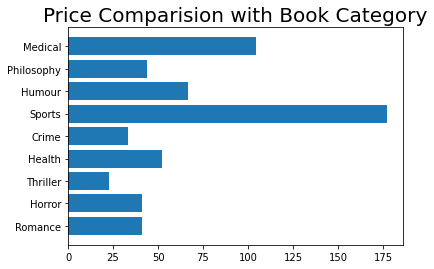

In [12]:
import matplotlib.pyplot as plt

plt.title('Price Comparision with Book Category',size=20)
plt.barh(books.category,books.price)
plt.show()

Turns out the most expensive books come from the sports category

### Train the model(Build a regressor)

In [13]:
target = books['price'].reset_index()
target = target.drop(["index"], axis=1).astype(float)

features = books.drop(["price"], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

#### Create a pipeline

In [15]:
features_to_encode = ["author", "edition", "category"]
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown="ignore"),features_to_encode)], remainder='passthrough')
preprocessor

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['author', 'edition', 'category'])],
                  verbose=False)

In [16]:
rfr = RandomForestRegressor(random_state = 101, n_estimators = 50)
pipe = Pipeline([('preprocessor', preprocessor),('model', rfr)])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['author', 'edition',
                                                   'category'])],
                                   verbose=False)),
                ('model',
                 RandomForestRegressor(bootstrap=True, cc

In [17]:
# Predict the value of the book on the test subset
y_pred = pipe.predict(X_test)

In [20]:
print('RMSLE :',(np.sqrt(mean_squared_log_error( abs(y_test),abs(y_pred)))))

RMSLE : 0.3180289084857889


### Saving the model

In [21]:
import pickle

In [22]:
with open("pipe.pkl", "wb") as f:
  pickle.dump(pipe, f)